In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore') 

In [2]:
data= pd.read_csv('GOOG.csv')

In [3]:
data.shape 

(4908, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
1,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401
2,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.643840,124826132
3,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.540727,104429967
4,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.549693,98825037


In [5]:
data.index 

RangeIndex(start=0, stop=4908, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

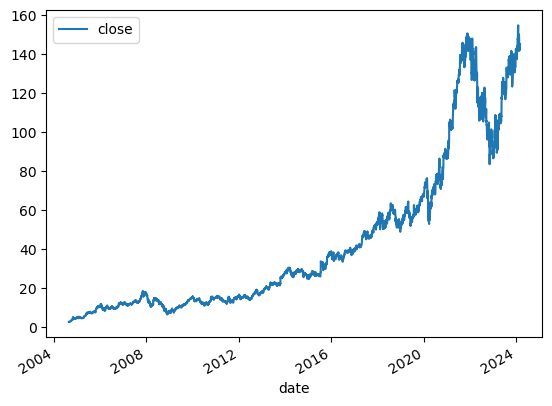

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('GOOG.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,4908.000000,4908.000000,4908.000000,4908.000000,4.908000e+03
mean,42.622678,43.073518,42.193902,42.642692,1.175340e+08
std,39.807308,40.257057,39.408983,39.840627,1.502541e+08
min,2.470490,2.534002,2.464263,2.490913,1.584340e+05
25%,12.897158,13.028417,12.782650,12.910546,2.812650e+07
50%,26.702589,26.917050,26.491000,26.697603,5.936769e+07
75%,58.546000,58.960376,57.959500,58.497127,1.455897e+08
max,154.009995,155.199997,152.919998,154.839996,1.650833e+09


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,2.687676
2004-08-26,2.613952,2.688672,2.606729,2.687676,142572401,2.643840
2004-08-27,2.692408,2.705360,2.632383,2.643840,124826132,2.540727
2004-08-30,2.622171,2.627402,2.540727,2.540727,104429967,2.549693
2004-08-31,2.547950,2.583068,2.544463,2.549693,98825037,2.496891


In [13]:
data['previousday']=data['close'].shift(1)

In [14]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,2.687676,NaN
2004-08-26,2.613952,2.688672,2.606729,2.687676,142572401,2.643840,2.640104
2004-08-27,2.692408,2.705360,2.632383,2.643840,124826132,2.540727,2.687676
2004-08-30,2.622171,2.627402,2.540727,2.540727,104429967,2.549693,2.643840
2004-08-31,2.547950,2.583068,2.544463,2.549693,98825037,2.496891,2.540727


In [15]:
train = data.iloc[:-200]
test = data.iloc[-200:]

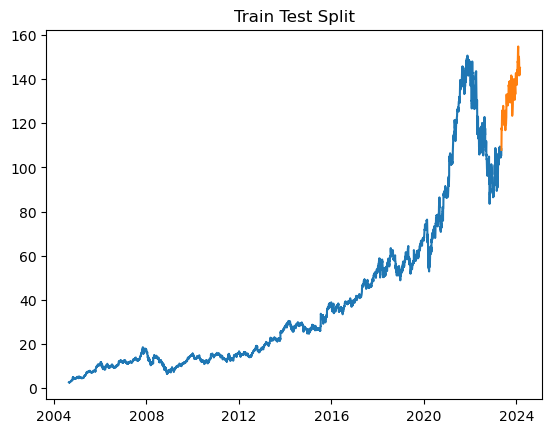

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 0.78
MAPE: 0.01
minae: 0.01
maxae: 5.29
medae: 0.61

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 0.90
MAPE: 0.01
minae: 0.00
maxae: 5.84
medae: 0.67

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 0.92
MAPE: 0.01
minae: 0.00
maxae: 5.15
medae: 0.73

Learning rate set to 0.340007
0:	learn: 24.8117458	total: 137ms	remaining: 13.5s
1:	learn: 17.0104678	total: 139ms	remaining: 6.8s
2:	learn: 11.6251739	total: 142ms	remaining: 4.58s
3:	learn: 8.1356557	total: 144ms	remaining: 3.45s
4:	learn: 5.7981203	total: 146ms	remaining: 2.77s
5:	learn: 4.2822904	total: 149ms	remaining: 2.33s
6:	learn: 3.3888946	total: 151ms	remaining: 2s
7:	learn: 2.7004237	total: 153ms	remaining: 1.75s
8:	learn: 2.3540515	total: 155ms	remaining: 1.56s
9:	learn: 2.0948310	total: 158ms	remaining: 1.42s
10:	learn: 1.8999449	total: 160ms	remaining: 

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2023-05-09,107.940002,108.418070
2023-05-10,112.279999,111.714589
2023-05-11,116.900002,116.218214
2023-05-12,117.919998,117.285407
2023-05-15,116.959999,117.285407
...,...,...
2024-02-16,141.759995,142.702843
2024-02-20,142.199997,142.246817
2024-02-21,143.839996,142.338470


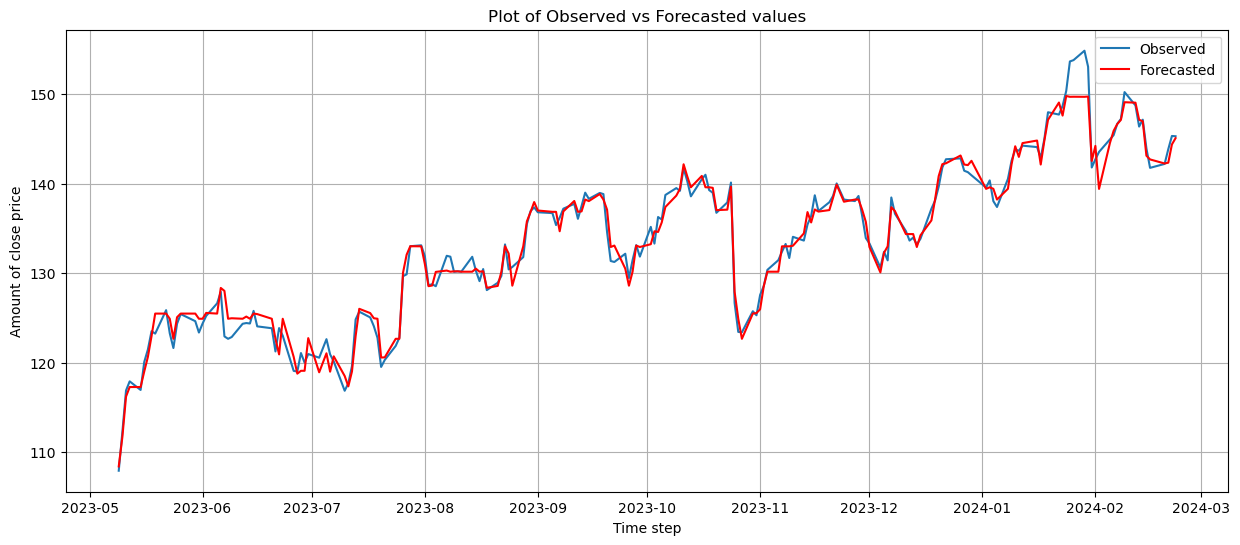

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,2.687676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-26,2.613952,2.688672,2.606729,2.687676,142572401,2.643840,2.640104,1.008929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-27,2.692408,2.705360,2.632383,2.643840,124826132,2.540727,2.687676,0.991778,5.327780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-30,2.622171,2.627402,2.540727,2.540727,104429967,2.549693,2.643840,0.980112,5.331516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-31,2.547950,2.583068,2.544463,2.549693,98825037,2.496891,2.540727,1.001761,5.184567,0.975993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(4908, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
2004-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.640104,NaN
2004-08-26,1.008929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.687676,NaN
2004-08-27,0.991778,5.327780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.643840,NaN
2004-08-30,0.980112,5.331516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.540727,NaN
2004-08-31,1.001761,5.184567,0.975993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.549693,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(3908, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2008-08-14,1.005430,24.972397,1.009373,61.708949,0.955998,791.993909,0.898474,3503.042716,1.248973,10070.379985,12.590059,0.046325,12.520819,12.509175,10.072897,12.634196
2008-08-15,1.004588,25.044128,1.012556,62.365737,0.966024,790.172984,0.906678,3503.178457,1.259235,10080.329940,12.706124,0.056868,12.583417,12.567145,10.075525,12.637705
2008-08-18,0.988249,25.296183,0.990034,62.742823,0.945111,789.180703,0.885670,3503.483065,1.228796,10090.348388,12.410981,0.051821,12.569055,12.540308,10.077854,12.626645
2008-08-19,0.992112,25.117105,0.979249,62.679561,0.931911,787.906480,0.871944,3503.276091,1.208404,10100.115529,12.216709,0.048391,12.444605,12.480968,10.079984,12.606648
2008-08-20,0.994362,24.627690,0.974115,62.377942,0.923681,786.558533,0.862334,3502.721918,1.193728,10109.791511,12.079722,0.047516,12.235804,12.353384,10.081974,12.580944


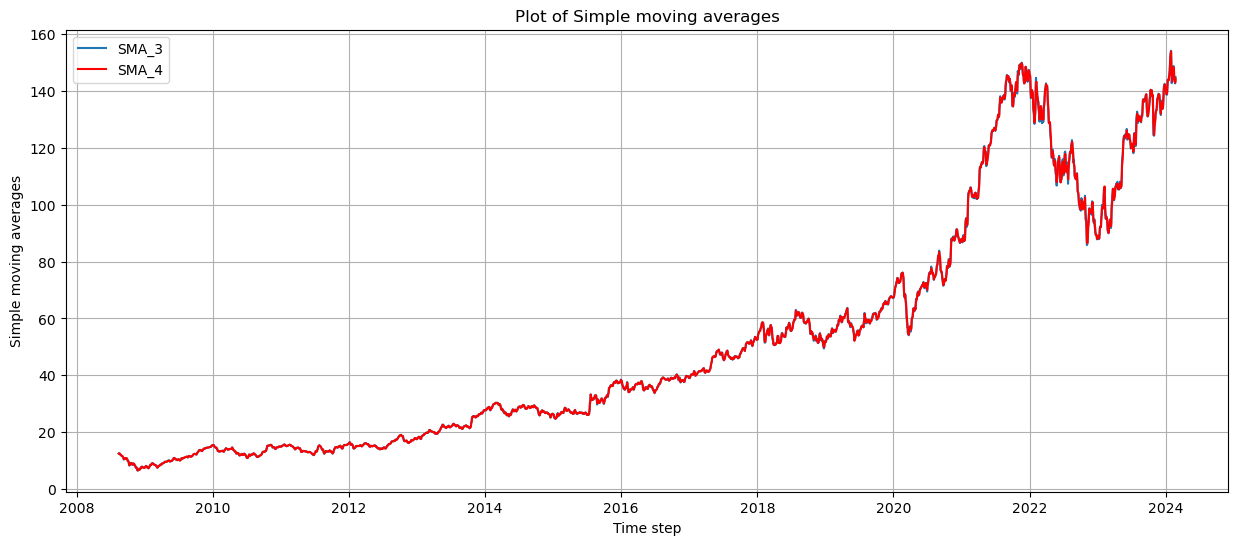

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

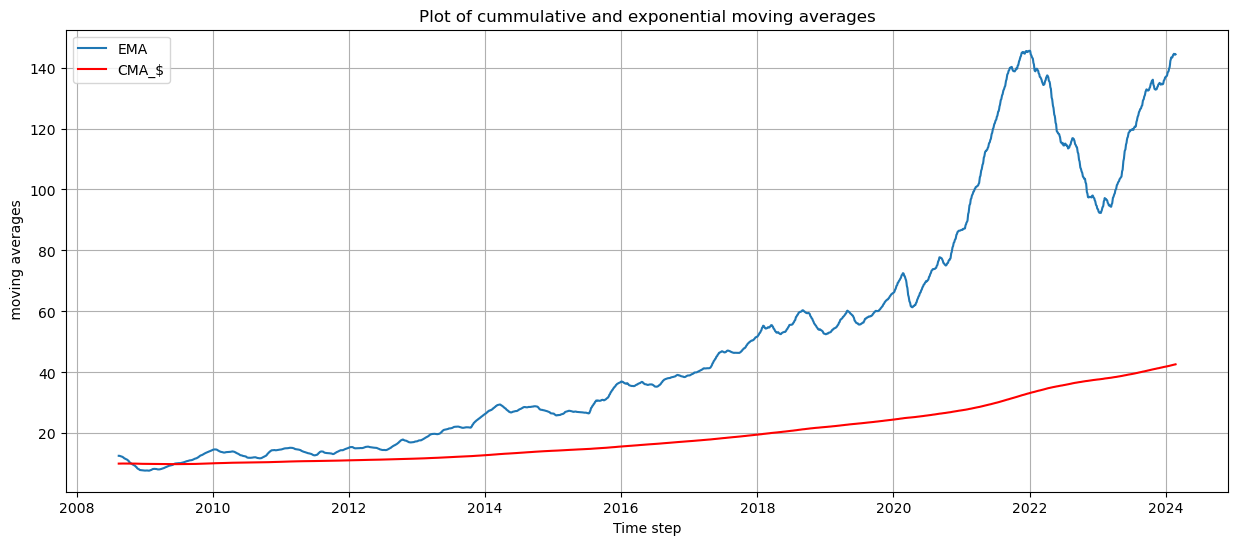

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

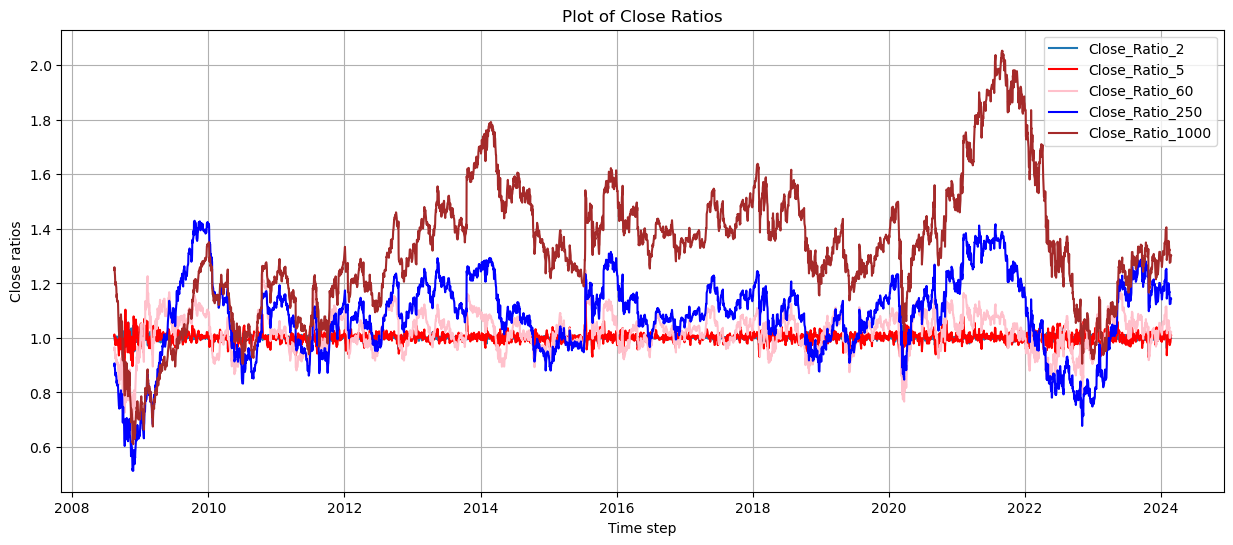

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

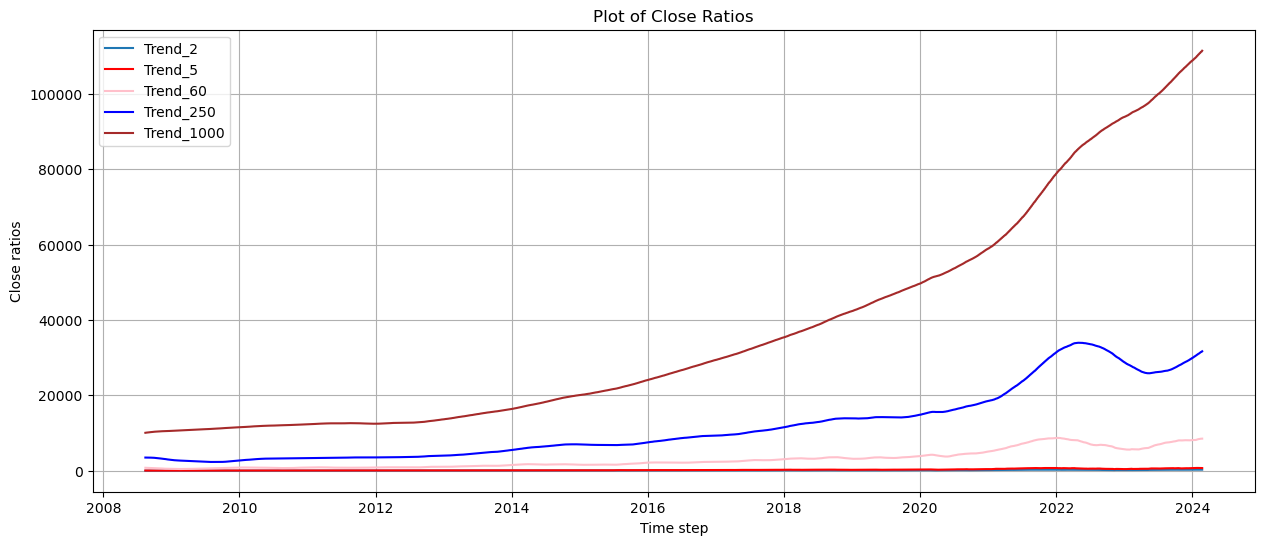

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

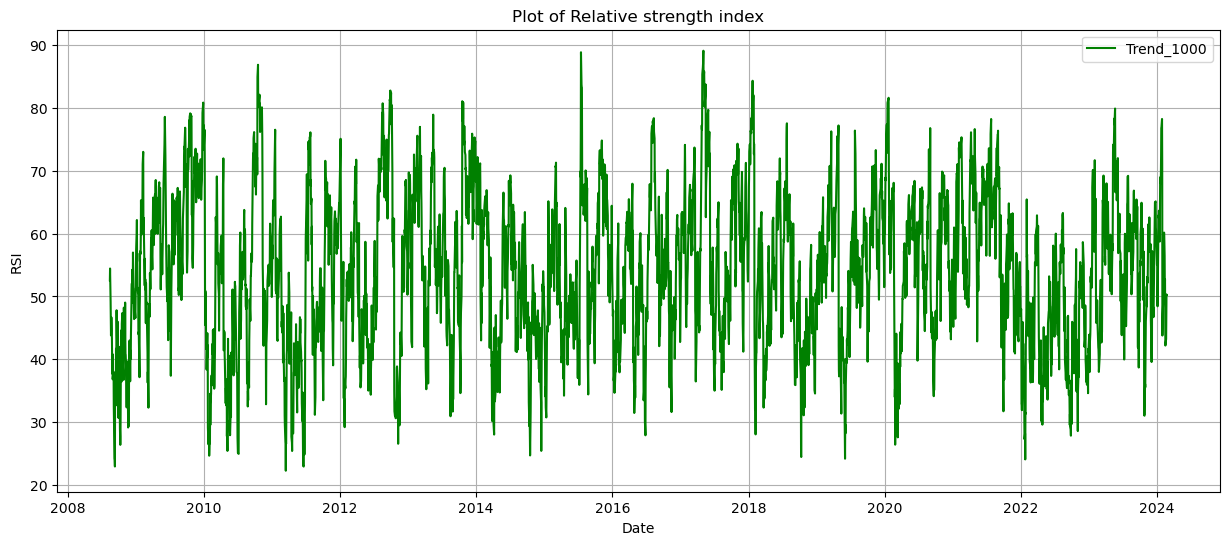

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

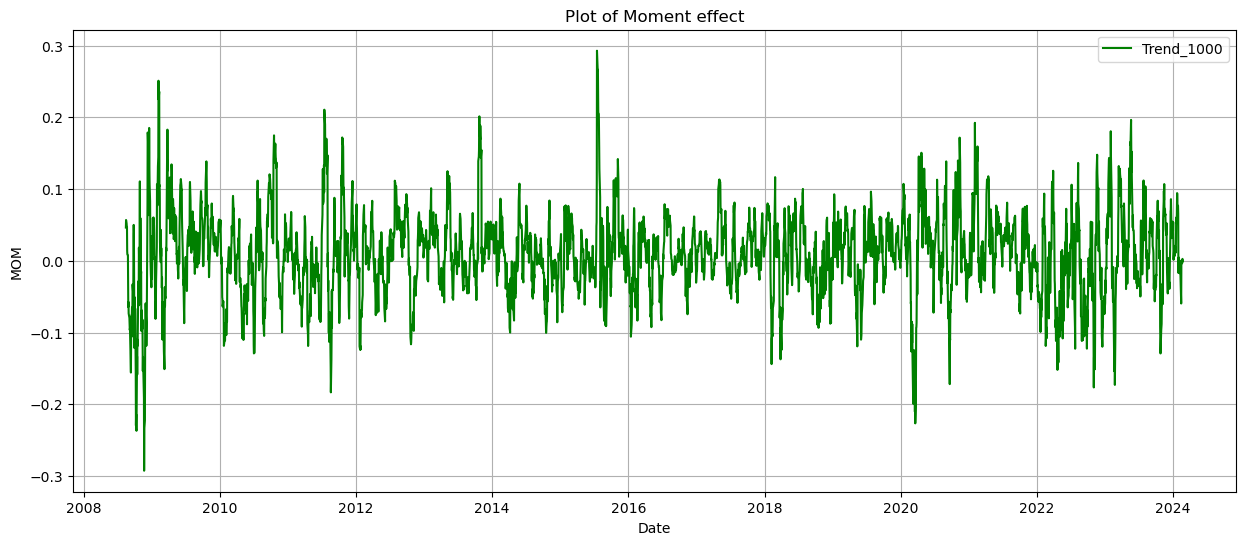

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [43]:
train = new_data.iloc[:-200]
test = new_data.iloc[-200:]

In [44]:
train.shape

(3708, 18)

In [45]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [46]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday'] 

#### Retrain the models on the new predictors

In [47]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 1.33
MAPE: 0.01
minae: 0.00
maxae: 7.37
medae: 1.10

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 1.39
MAPE: 0.01
minae: 0.01
maxae: 5.86
medae: 1.12

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 1.34
MAPE: 0.01
minae: 0.04
maxae: 6.10
medae: 1.02

Learning rate set to 0.327419
0:	learn: 25.5401630	total: 3.02ms	remaining: 299ms
1:	learn: 17.9250926	total: 5.94ms	remaining: 291ms
2:	learn: 12.5327330	total: 8.54ms	remaining: 276ms
3:	learn: 8.8853792	total: 12.5ms	remaining: 300ms
4:	learn: 6.4217789	total: 15.8ms	remaining: 300ms
5:	learn: 4.8906508	total: 19.7ms	remaining: 309ms
6:	learn: 3.8807230	total: 23.6ms	remaining: 313ms
7:	learn: 3.2324526	total: 27.2ms	remaining: 312ms
8:	learn: 2.8233095	total: 30.3ms	remaining: 307ms
9:	learn: 2.5521131	total: 33.4ms	remaining: 301ms
10:	learn: 2.4059315	total: 38ms	remaining: 308ms
11:	learn: 2.2754424	to

#### Improving the model

In [48]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [49]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [50]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [51]:
predictions_2 = backtest(new_data, model_2, predictors)

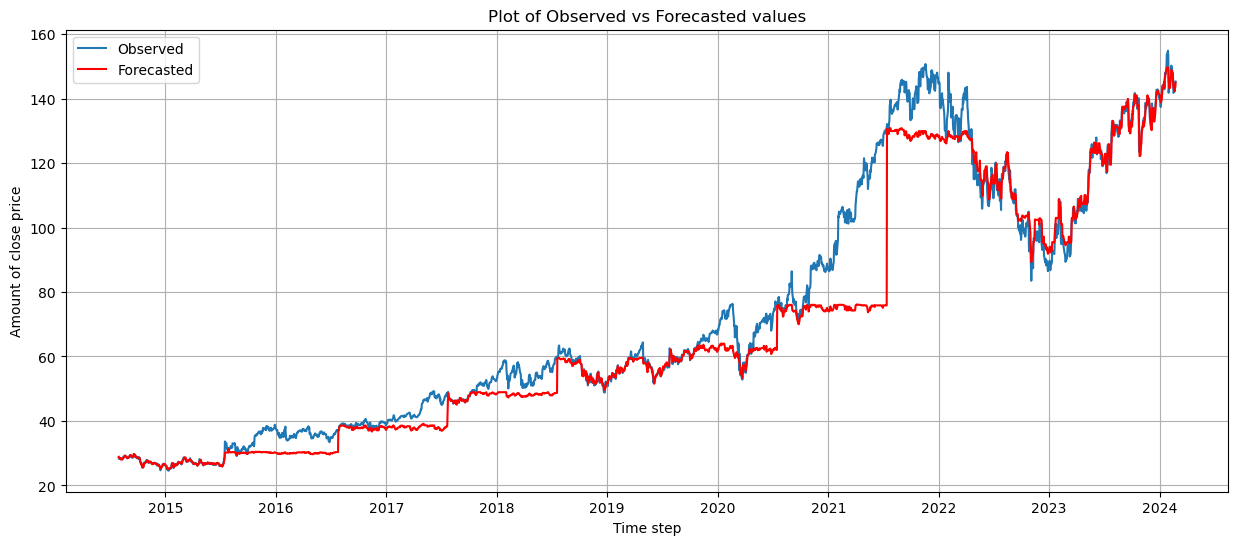

In [52]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [53]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [54]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [55]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.01214795217084419

mean absolute  error is : 1.587887489448749



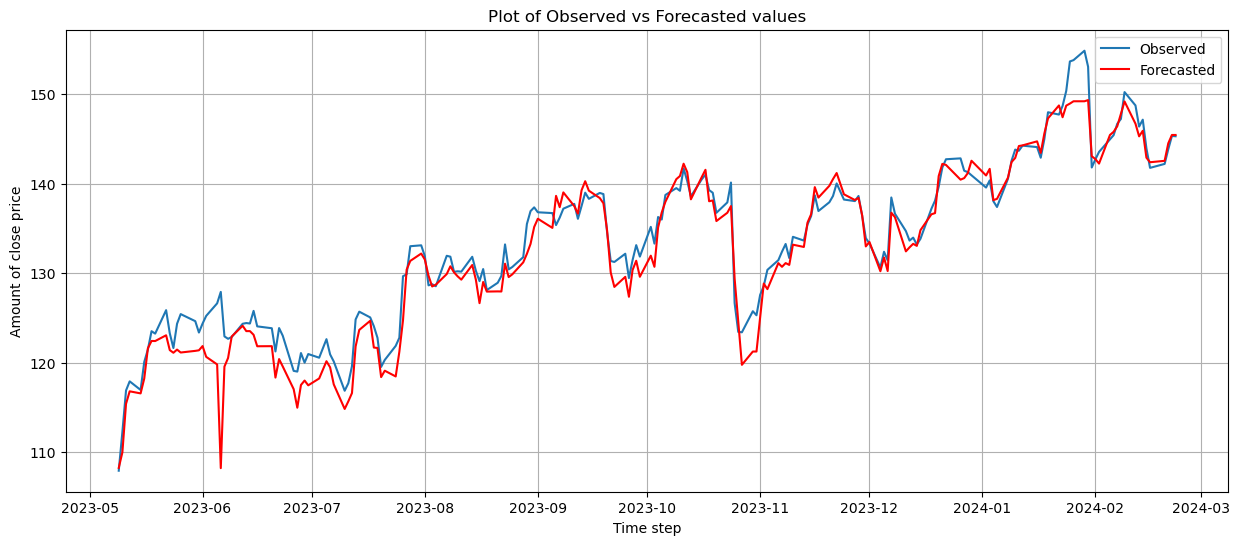

In [56]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [57]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [58]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [59]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 1.1747895125730496 
 gradientboost minae: 0.0011753014287023689 
 gradientboost maxae: 5.171039362086063 
 gradientboost medae: 0.9457253025490644 
 gradientboost Mape: 0.00888062919545785 
  

 <-------------------------------------------------->



In [60]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2023-05-09,107.940002,107.312949
2023-05-10,112.279999,110.757666
2023-05-11,116.900002,113.004634
2023-05-12,117.919998,116.437622
2023-05-15,116.959999,118.114539
...,...,...
2024-02-16,141.759995,144.079131
2024-02-20,142.199997,142.563227
2024-02-21,143.839996,142.999105


In [61]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [62]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.00888062919545785

mean absolute  error is : 1.1747895125730496



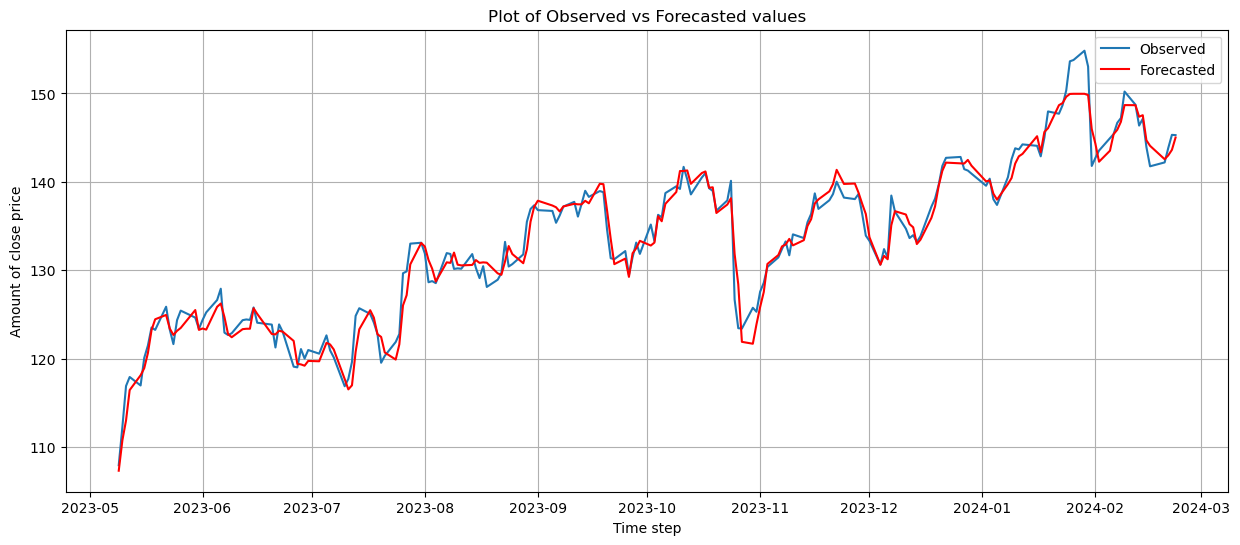

In [63]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [64]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 1.405760492000002 
 bagging minae: 0.0036482000000148673 
 bagging maxae: 6.639552299999977 
 bagging medae: 1.1792022000000202 
 bagging Mape: 0.010658954030499025 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.9167938585226375 
 stacking minae: 0.008669274633334112 
 stacking maxae: 6.1666577581898 
 stacking medae: 0.7266922317914037 
 stacking mape: 0.006965138305077663 



In [65]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [66]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [67]:
combined_bagg.head()

,close,0
date,,
2023-05-09,107.940002,106.390001
2023-05-10,112.279999,112.560001
2023-05-11,116.900002,113.462652
2023-05-12,117.919998,116.252051
2023-05-15,116.959999,117.850399


In [68]:
combined_stack

,close,0
date,,
2023-05-09,107.940002,107.948671
2023-05-10,112.279999,111.811662
2023-05-11,116.900002,114.146562
2023-05-12,117.919998,117.750061
2023-05-15,116.959999,118.589126
...,...,...
2024-02-16,141.759995,143.905591
2024-02-20,142.199997,141.911998
2024-02-21,143.839996,142.710938


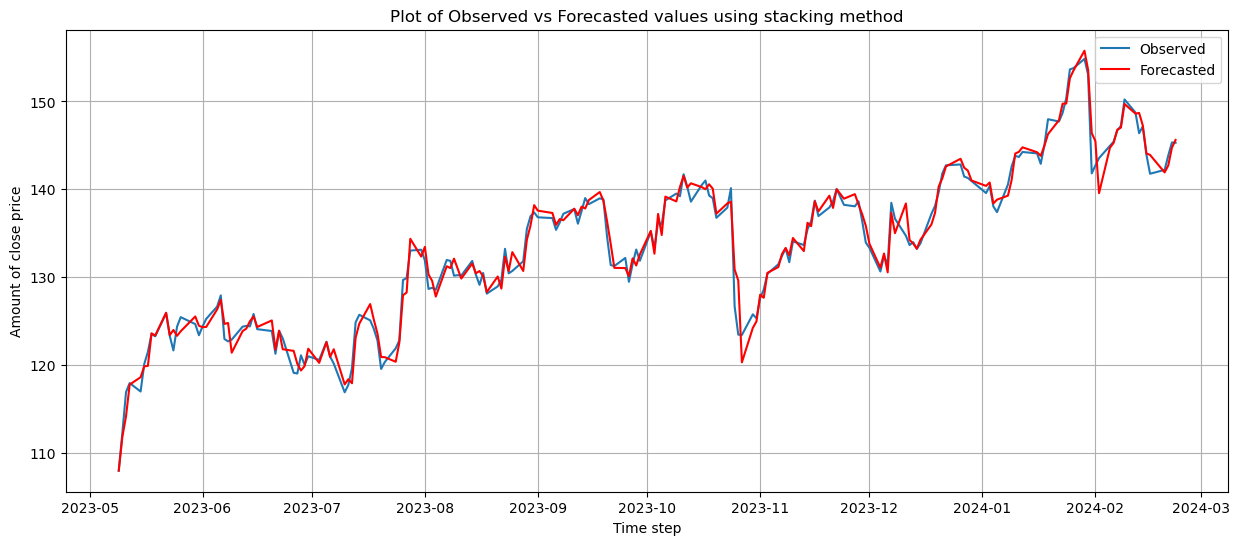

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

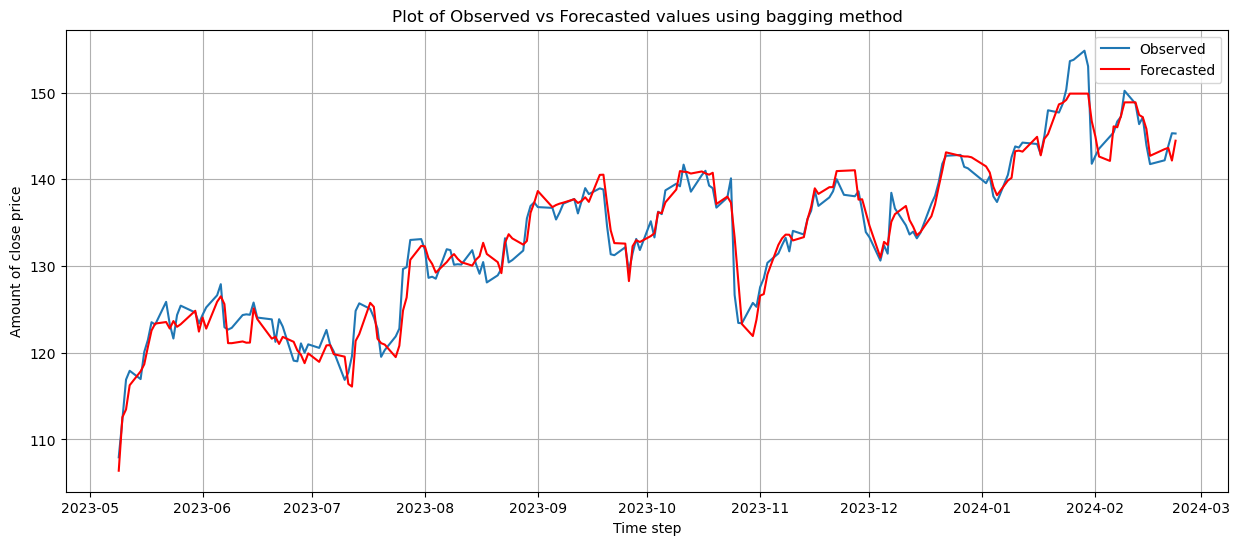

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

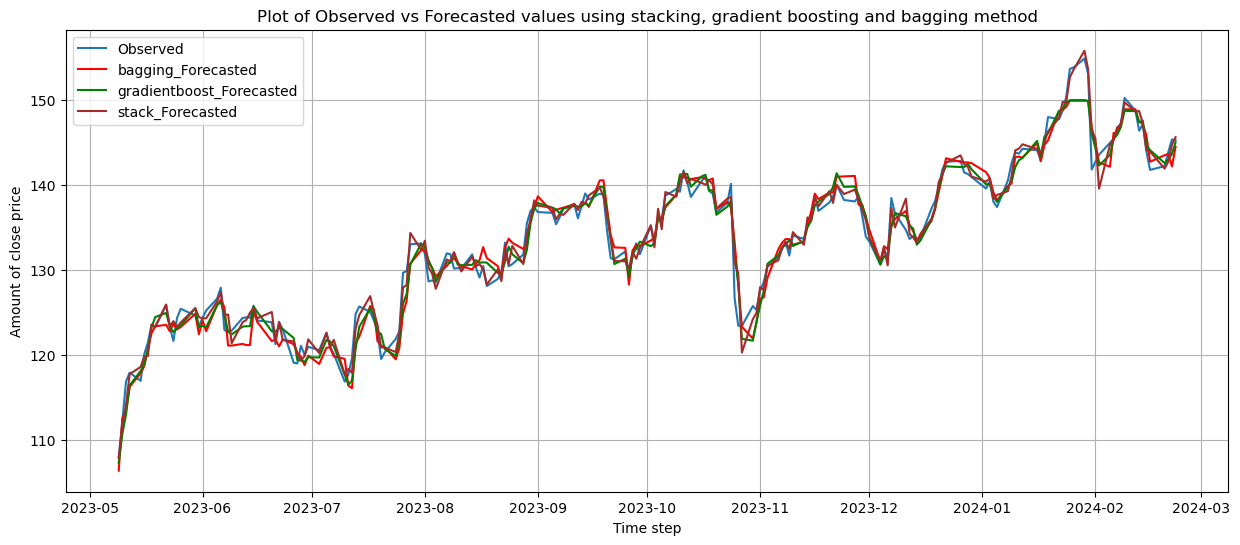

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('GOOGleresult.png')
plt.show()

In [72]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 1.33, 0.01, 0.00, 7.37, 1.10])
task1_result.add_row(['XGboost', 1.39, 0.01, 0.01, 5.86, 1.12])
task1_result.add_row(['GradientBoost', 1.34, 0.01, 0.04, 6.10, 1.02])
task1_result.add_row(['Catboost', 1.59, 0.01, 0.03, 19.68, 1.14])
task1_result.add_row(['Bagging', 1.41, 0.01, 0.003, 6.64, 1.18])
task1_result.add_row(['Stacking', 0.97, 0.007, 0.000, 6.41, 0.80])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     1.33    |     0.01     |      0.0      |      7.37     |      1.1      |
|    XGboost    |     1.39    |     0.01     |      0.01     |      5.86     |      1.12     |
| GradientBoost |     1.34    |     0.01     |      0.04     |      6.1      |      1.02     |
|    Catboost   |     1.59    |     0.01     |      0.03     |     19.68     |      1.14     |
|    Bagging    |     1.41    |     0.01     |     0.003     |      6.64     |      1.18     |
|    Stacking   |     0.97    |    0.007     |      0.0      |      6.41     |      0.8      |
+---------------+-------------+--------------+---------------+---------------+---------------+
